In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn.functional as F
from torchvision import transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from unet.unet_helpers import MicroscopeImageDataset, BrightnessContrastAdjustment
from unet.unet import UNet

255
0 (960, 1280) (960, 1280)
255
1 (960, 1280) (960, 1280)
255
2 (960, 1280) (960, 1280)
255
3 (960, 1280) (960, 1280)


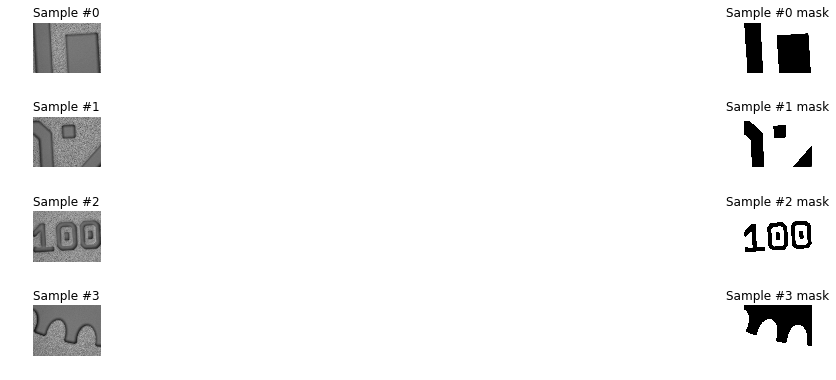

In [12]:
# Show the samples
etching_dataset = MicroscopeImageDataset(img_dir='./images/etching/', mask_dir='./images/etching/masks/',
                                         transform=None, 
                                        split_samples=None)

fig = plt.figure(figsize=(20,13))

for i in range(len(etching_dataset)):
    sample = etching_dataset[i]
    image, mask = sample['image'], sample['mask']

    print(i, image.shape, mask.shape)

    ax = plt.subplot(10, 2, 2*i + 1)
    plt.tight_layout()
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    
    ax = plt.subplot(10, 2, 2*i + 2)
    plt.tight_layout()
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax.set_title('Sample #{} mask'.format(i))
    ax.axis('off')


    if i == 9:
        plt.show()
        break

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_classes=2, padding=True, up_mode='upsample').to(device)
optim = torch.optim.Adam(model.parameters())
dataloader = ...
epochs = 10

for _ in range(epochs):
    for X, y in dataloader:
        X = X.to(device)  # [N, 1, H, W]
        y = y.to(device)  # [N, H, W] with class indices (0, 1)
        prediction = model(X)  # [N, 2, H, W]
        loss = F.cross_entropy(prediction, y)

        optim.zero_grad()
        loss.backward()
        optim.step()